# Bank Churn Dataset Binaery Classification Analysis in Deep Learning
`Author:` Muhammad Nauman Sair, MBA, CSM, BSA\
Program Manager || Business System Analyst || Implementation Analyst || Scrum Master || Python || Data Analyst || ML\
`Contact:` MNSair@live.com | +1-571-969-7247 |
[GitHub](https://github.com/mnsair) |
[Kaggle](https://www.kaggle.com/muhammadnaumansair) |
[LinkedIn](https://www.linkedin.com/in/muhammad-nauman-sair/) |
[Twitter-X](https://twitter.com/NaumanSair)



## Purpose
**`Question:`**
Will the consumer choose to remain with our bank for future business and transactions, or opt for another bank? \
This study, leveraging Deep Learning Neural Network, aims to predict whether the customer will retain their account with us or migrate to another financial institution.

**`Data Descriptions:`**
  - `id:` A unique ID in the Dataset.
  - `CustomerId:` A unique identification number for each customer.
  - `CreditScore:` A numeric value between 300 to 850 representing the creditworthiness of a customer.
  - `Age:` Customer's age in years.
  - `Tenure:` The number of years the customer has been doing business with the bank.
  - `Balance:` The customer's account balance.
  - `NumOfProducts:` The number of products offered or used by the customer from the bank.
  - `HasCrCard:` Indicates whether the customer has a credit card or not.
  - `IsActiveMember:` Indicates whether the customer is active or inactive.
  - `EstimatedSalary:` Represents the salary of the customer.
  - `Exited:` Whether the customer has churned (Stayed/Exited - The Target Variable).

In [41]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Import Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# trun off the warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Load the dataset
df= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [24]:
# Train dataset and exploration
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [25]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


As per the data information there is no null value in the data set.

In [26]:
# list of all columns
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
# find the ojbect columns
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [28]:
# find the numerical columns
numerical_columns = df.select_dtypes(exclude='object').columns
numerical_columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
# describe the dataset, this will give us a summary of the numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


### Identify and explore the `Categorical` (cate) and `Numeric` (num) columns.

**`Categorical (cate) Columns`**

In [65]:
# find the categorical columns
cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Geography', 'Gender']

# Find the value of counts of the categorical columns
for col in cate_cols:
    print(df[col].value_counts())
    print()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64

Geography
0    94215
2    36213
1    34606
Name: count, dtype: int64

Gender
1    93150
0    71884
Name: count, dtype: int64



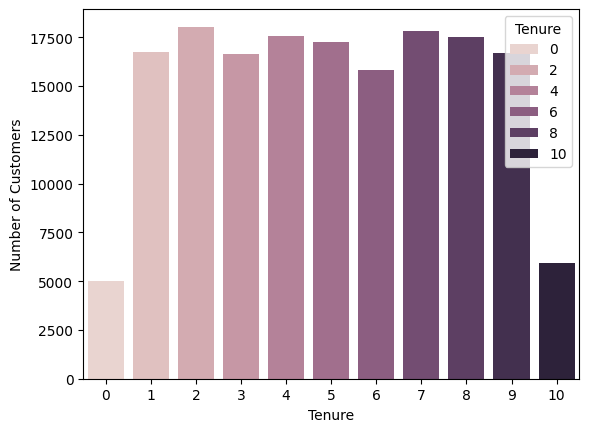

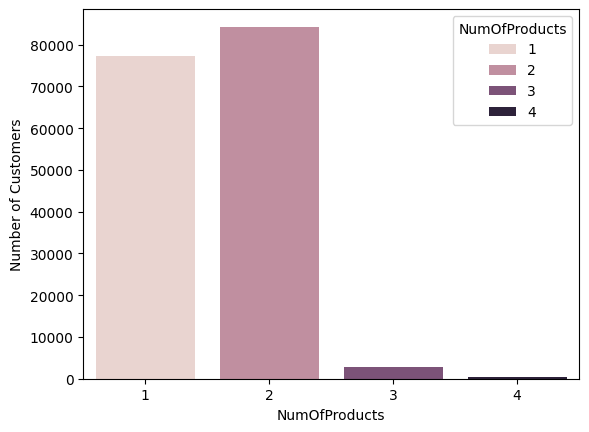

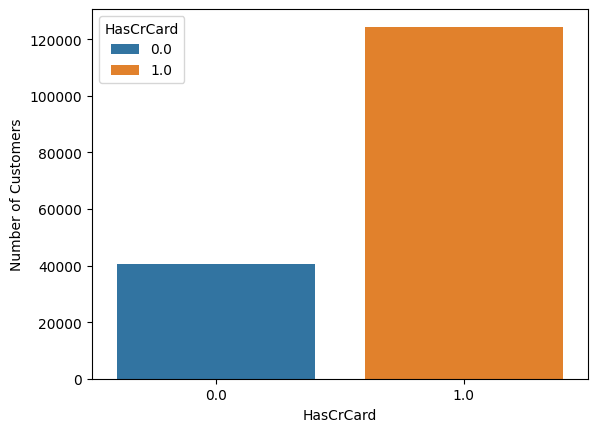

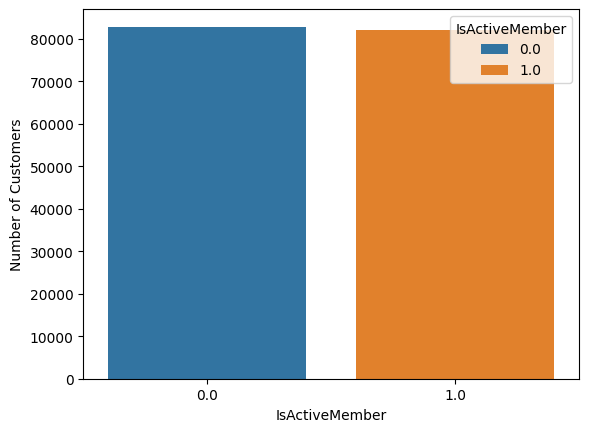

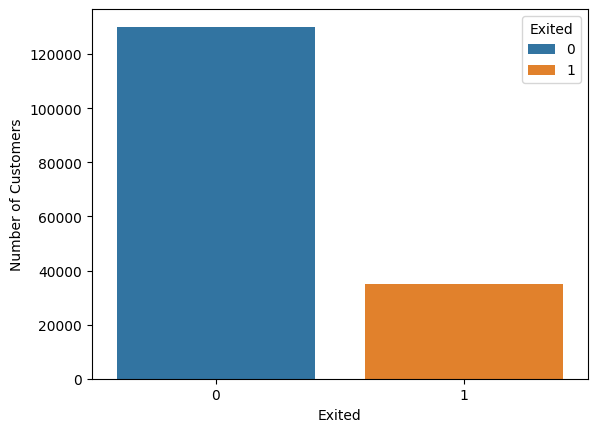

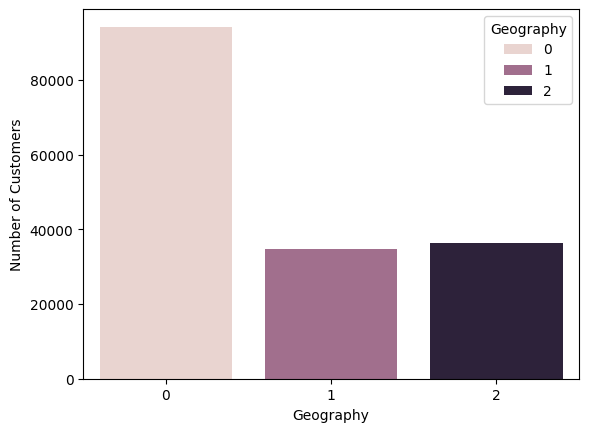

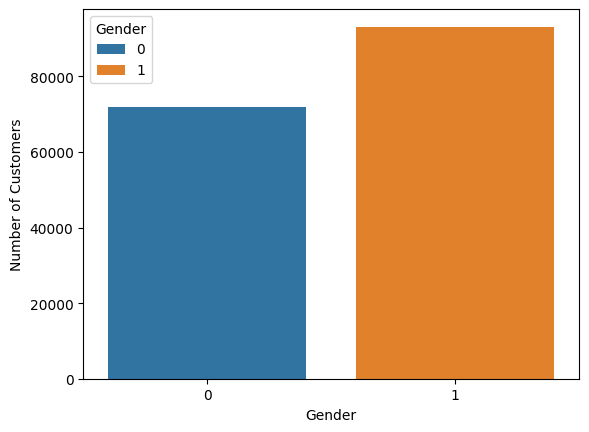

In [67]:
# Create a count plots for each categorical column
for col in cat_cols:
    sns.countplot(df , x = df[col], hue=col)
    plt.ylabel('Number of Customers')
    plt.show()

**`Numeric (num) Columns`**

In [32]:
# find the numerical columns
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Find the value of counts of the categorical columns
for col in num_cols:
    print(df[col].value_counts())
    print()

CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64

Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64



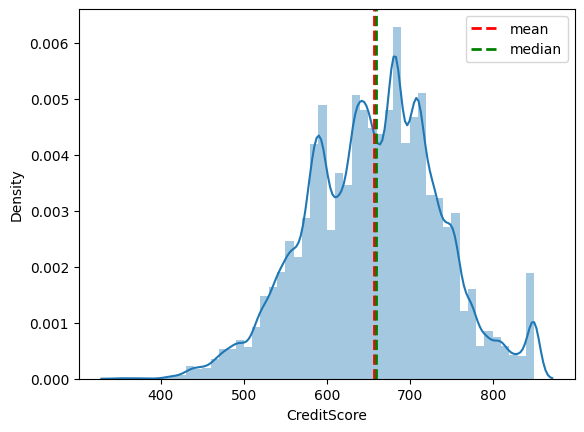

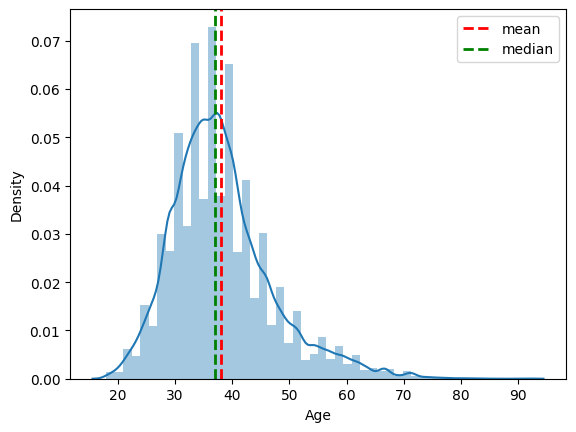

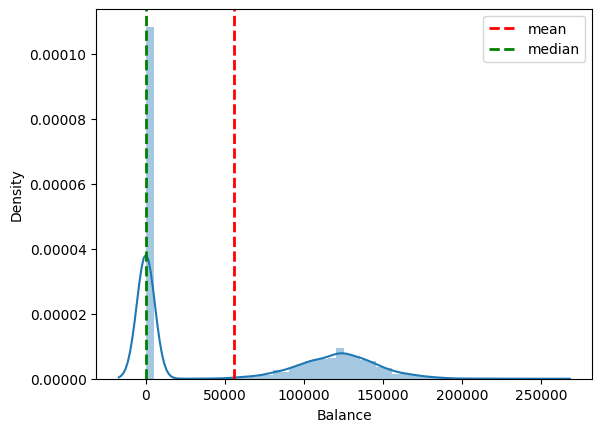

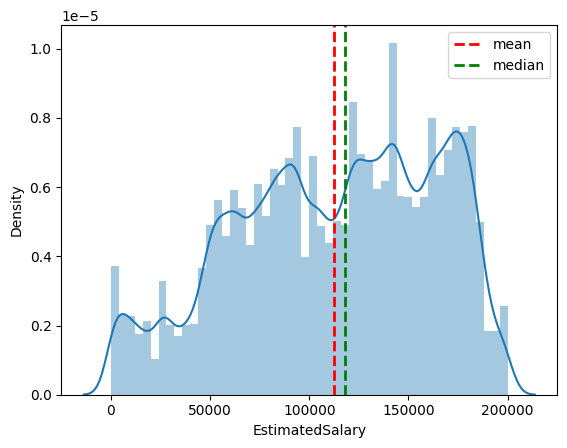

In [33]:
# Create histogram of numerical columns with mean and median using sns and kde=True
for col in num_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=2, label='median')
    plt.legend()
    plt.show()

For `balance` you can ignore median as it not showing the actual value based on visiting only customers.

In [34]:
# Print the number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 165034, Number of columns: 14


## Neural Network Architecture

In [35]:
# Convert the categorical columns to numerical values for the model
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [36]:
# Split the data into train and test
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis=1)
# Remove the id, CustomerId and Surname columns from the dataset as they are not needed to predict the target variable

y = df['Exited'] 

print(X.head())
print('--------------------')
print(y.head())


   CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          668          0       1  33.0       3       0.00              2   
1          627          0       1  33.0       1       0.00              2   
2          678          0       1  40.0      10       0.00              2   
3          581          0       1  34.0       2  148882.54              1   
4          716          2       1  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  
0        1.0             0.0        181449.97  
1        1.0             1.0         49503.50  
2        1.0             0.0        184866.69  
3        1.0             1.0         84560.88  
4        1.0             1.0         15068.83  
--------------------
0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64


In [37]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

### First Approch to `Predict` the Charan

In [38]:
# # Split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# # Create a deep neural network model using tensorflow for binary classification
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# # Define and build the model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', 
#                           input_shape=(X_train.shape[1],)), #input layer
#     tf.keras.layers.Dense(64, activation='relu'), #hidden layer 1
#     tf.keras.layers.Dense(32, activation='relu'), #hidden layer 2
#     tf.keras.layers.Dense(16, activation='relu'), #hidden layer 3
#     tf.keras.layers.Dense(8, activation='relu'), #hidden layer 4
#     tf.keras.layers.Dense(1, activation='relu'), #hidden layer 5
    
#     tf.keras.layers.Dense(1, activation='sigmoid') #output layer
# ])


# # Define the callback function
# early_stop = EarlyStopping(patience=15)


# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # train the model and plot the training and testing loss and accuracy at each epoch
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# # Plot the training and testing loss and accuracy at each epoch
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(history.history['loss'], label='Training Loss')
# ax.plot(history.history['val_loss'], label='Validation Loss')
# ax.legend()
# plt.show()

# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(history.history['accuracy'], label='Training Accuracy')
# ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
# ax.legend()
# plt.show()

### Second Approch to `Predict` the Charan

Epoch 1/20
4126/4126 [==============================] - 11s 2ms/step - loss: 0.4591 - accuracy: 0.7983 - val_loss: 0.3619 - val_accuracy: 0.8403
Epoch 2/20
4126/4126 [==============================] - 10s 2ms/step - loss: 0.3971 - accuracy: 0.8275 - val_loss: 0.3380 - val_accuracy: 0.8555
Epoch 3/20
4126/4126 [==============================] - 10s 2ms/step - loss: 0.3857 - accuracy: 0.8351 - val_loss: 0.3432 - val_accuracy: 0.8506
Epoch 4/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3815 - accuracy: 0.8374 - val_loss: 0.3321 - val_accuracy: 0.8591
Epoch 5/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3779 - accuracy: 0.8383 - val_loss: 0.3395 - val_accuracy: 0.8558
Epoch 6/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3770 - accuracy: 0.8399 - val_loss: 0.3339 - val_accuracy: 0.8626
Epoch 7/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3764 - accuracy: 0.8407 - val_loss: 0.3459 - val_ac

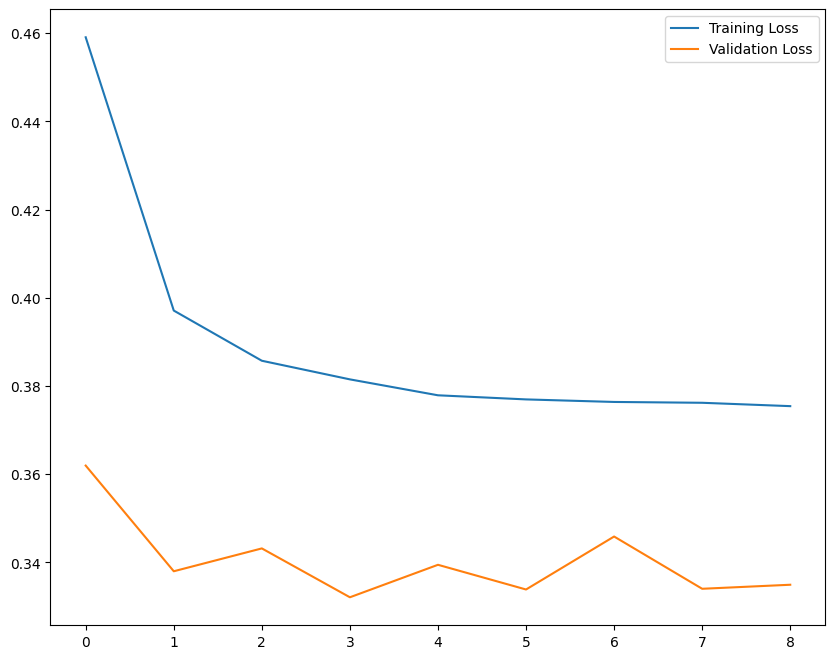

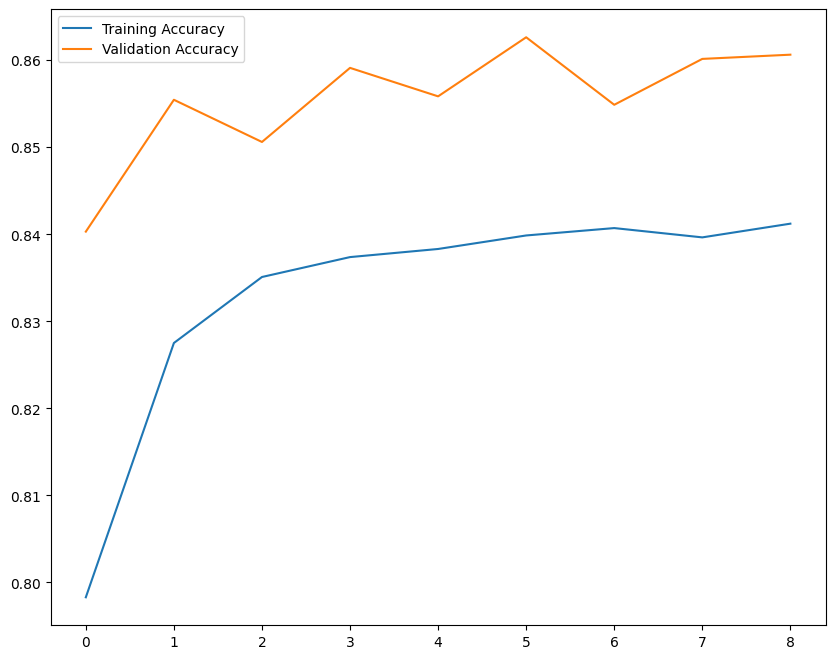

In [43]:
# Normalize input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Updated model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Define the callback function
early_stop = EarlyStopping(patience=5)

# Compile the model with binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with normalized data
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1, 
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stop])

# Plot the training and testing loss and accuracy at each epoch
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.legend()
plt.show()


In [44]:
# Evaluate the model
model.evaluate(X_test_scaled, y_test)

# Make predictions
predictions = model.predict(X_test_scaled)


1032/1032 [==============================] - 1s 1ms/step


In [45]:
# Endore the categorical columns
from sklearn.preprocessing import LabelEncoder

# Convert the categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# XGB Classifier

Accuracy Score:  0.8644226982155301
Precision Score:  0.8644226982155301
Recall Score:  0.5555555555555556
F1 Score:  0.6342460155292194


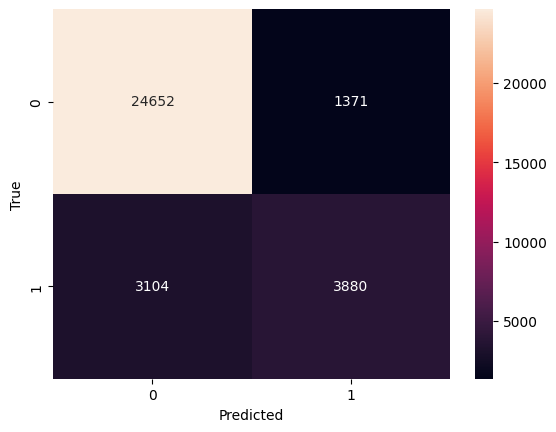

In [46]:
# train the xgboost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# make predictions on the test set
predictions = xgb_model.predict(X_test)

# evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, average='micro'))
print("Recall Score: ", recall_score(y_test, predictions))
print("F1 Score: ", f1_score(y_test, predictions))

# plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
# Endore the categorical columns
from sklearn.preprocessing import LabelEncoder

# Convert the categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

In [55]:
# Predict the test data and create a submission file of probability of each class
predictions = xgb_model.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))
submission['Exited'] = predictions[:,1]
submission.to_csv('submission.csv', index=False)
